# WeatherPy
----
Analysis
* The weather becomes significantly warmer in cities that are closer to the equator (0 deg. Latitude). 
* There is no strong relationship between cloudiness and latitude. What is interesting is that there are a cluster of cities at 0 Deg, Latitude & 40-60 Deg.Latitde and have 100% humidity. 
* There is no strong relationship between latitude and wind speed. 

In [5]:
import os
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import requests
import json
import csv
import time
import numpy as np
import urllib

#API key
from api_keys import api_key

#Incorporate citipy to determine city based on latitiude and longitude
from citipy import citipy

#Output file
output_data_file = "output_data/cities.csv"

#Range of latitiude and Longtitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
lat_lng = []
cities = []

#create a random set of lat and lng combos
lats = np.random.uniform(low=-90.00, high=90.00, size=1500)
lngs = np.random.uniform(low=-90.00, high=90.00, size=1500)
lat_lng = zip(lats, lngs)

for lat_lng in lat_lng:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# #OpenWeatherMap API key
# api_key = api_keys.api_key

# Starting URL for weather map api call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Create counters
record_count = 1
set_count = 1
number = 1

#List for hold items
city_name = []
city_lat=[]
city_lng = []
city_max_temp = []
city_humidity = []
city_cloudiness = []
city_wind = []
city_country = []
city_date = []

In [10]:
#Print to logger
print("Beginning Data Retrieval")
print("------------------------")


# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group of cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count +=1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)
    
    
     # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(url + '&q=' + city)).json()
        city_name.append(city_weather['name'])
        city_lat.append(city_weather['coord']['lat'])
        city_lng.append(city_weather['coord']['lon'])
        city_max_temp.append(city_weather['main']['temp'])
        city_humidity.append(city_weather['main']['humidity'])
        city_cloudiness.append(city_weather['clouds']['all'])
        city_wind.append(city_weather['wind']['speed'])
        print(f'City number {number} of {len(cities)} complete. | Added {city}')
        number = number + 1
        
    # If an error is experienced, skip the city
    except KeyError:
        print(f'Missing data in city number {number} of {len(cities)}. | Skipping {city}')
        number = number + 1
        
# Indicate that Data Loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=jamestown
City number 1 of 595 complete. | Added jamestown
Processing Record 1 of Set 1 | litoral del san juan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=litoral%20del%20san%20juan
Missing data in city number 2 of 595. | Skipping litoral del san juan
Processing Record 1 of Set 1 | monrovia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=monrovia
City number 3 of 595 complete. | Added monrovia
Processing Record 1 of Set 1 | shubarkuduk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=shubarkuduk
City number 4 of 595 complete. | Added shubarkuduk
Processing Record 1 of Set 1 | marcona
http://api.openweathermap.org/data/2.5/weather?

Missing data in city number 40 of 595. | Skipping taolanaro
Processing Record 1 of Set 1 | qarqin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=qarqin
City number 41 of 595 complete. | Added qarqin
Processing Record 1 of Set 1 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=port%20alfred
City number 42 of 595 complete. | Added port alfred
Processing Record 1 of Set 1 | calama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=calama
City number 43 of 595 complete. | Added calama
Processing Record 1 of Set 1 | bria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=bria
City number 44 of 595 complete. | Added bria
Processing Record 1 of Set 1 | vila velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=vila

City number 80 of 595 complete. | Added kutum
Processing Record 0 of Set 2 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=bredasdorp
City number 81 of 595 complete. | Added bredasdorp
Processing Record 0 of Set 2 | mahadday weyne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=mahadday%20weyne
Missing data in city number 82 of 595. | Skipping mahadday weyne
Processing Record 0 of Set 2 | klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=klaksvik
City number 83 of 595 complete. | Added klaksvik
Processing Record 0 of Set 2 | kita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=kita
City number 84 of 595 complete. | Added kita
Processing Record 0 of Set 2 | esik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b6767660

Missing data in city number 121 of 595. | Skipping barawe
Processing Record 0 of Set 3 | ahvaz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=ahvaz
City number 122 of 595 complete. | Added ahvaz
Processing Record 0 of Set 3 | lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=lagoa
City number 123 of 595 complete. | Added lagoa
Processing Record 0 of Set 3 | nakonde
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=nakonde
City number 124 of 595 complete. | Added nakonde
Processing Record 0 of Set 3 | road town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=road%20town
City number 125 of 595 complete. | Added road town
Processing Record 0 of Set 3 | grand gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=gran

City number 162 of 595 complete. | Added sandnessjoen
Processing Record 0 of Set 4 | coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=coquimbo
City number 163 of 595 complete. | Added coquimbo
Processing Record 0 of Set 4 | amapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=amapa
City number 164 of 595 complete. | Added amapa
Processing Record 0 of Set 4 | phalombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=phalombe
City number 165 of 595 complete. | Added phalombe
Processing Record 0 of Set 4 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=saint-pierre
City number 166 of 595 complete. | Added saint-pierre
Processing Record 0 of Set 4 | rock sound
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008c

City number 203 of 595 complete. | Added yar-sale
Processing Record 0 of Set 5 | shihezi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=shihezi
City number 204 of 595 complete. | Added shihezi
Processing Record 0 of Set 5 | ginda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=ginda
City number 205 of 595 complete. | Added ginda
Processing Record 0 of Set 5 | torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=torbay
City number 206 of 595 complete. | Added torbay
Processing Record 0 of Set 5 | san rafael
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=san%20rafael
City number 207 of 595 complete. | Added san rafael
Processing Record 0 of Set 5 | camaqua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=camaqua
Ci

City number 244 of 595 complete. | Added bridlington
Processing Record 0 of Set 5 | malanje
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=malanje
City number 245 of 595 complete. | Added malanje
Processing Record 0 of Set 5 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=iqaluit
City number 246 of 595 complete. | Added iqaluit
Processing Record 0 of Set 5 | sistranda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=sistranda
City number 247 of 595 complete. | Added sistranda
Processing Record 0 of Set 5 | alta floresta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=alta%20floresta
City number 248 of 595 complete. | Added alta floresta
Processing Record 0 of Set 5 | quartucciu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b

City number 285 of 595 complete. | Added imatra
Processing Record 0 of Set 6 | novosokolniki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=novosokolniki
City number 286 of 595 complete. | Added novosokolniki
Processing Record 0 of Set 6 | ajdabiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=ajdabiya
City number 287 of 595 complete. | Added ajdabiya
Processing Record 0 of Set 6 | kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=kavaratti
City number 288 of 595 complete. | Added kavaratti
Processing Record 0 of Set 6 | ust-shonosha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=ust-shonosha
City number 289 of 595 complete. | Added ust-shonosha
Processing Record 0 of Set 6 | sakakah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb156

City number 325 of 595 complete. | Added lucea
Processing Record 0 of Set 7 | atar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=atar
City number 326 of 595 complete. | Added atar
Processing Record 0 of Set 7 | tsumeb
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=tsumeb
City number 327 of 595 complete. | Added tsumeb
Processing Record 0 of Set 7 | timbiqui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=timbiqui
City number 328 of 595 complete. | Added timbiqui
Processing Record 0 of Set 7 | tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=tessalit
City number 329 of 595 complete. | Added tessalit
Processing Record 0 of Set 7 | norrtalje
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=norrtalje
City numb

City number 366 of 595 complete. | Added ismailia
Processing Record 0 of Set 8 | kendallville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=kendallville
City number 367 of 595 complete. | Added kendallville
Processing Record 0 of Set 8 | murgab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=murgab
City number 368 of 595 complete. | Added murgab
Processing Record 0 of Set 8 | bazarnyye mataki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=bazarnyye%20mataki
City number 369 of 595 complete. | Added bazarnyye mataki
Processing Record 0 of Set 8 | crnici
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=crnici
City number 370 of 595 complete. | Added crnici
Processing Record 0 of Set 8 | barcelos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb1564

City number 406 of 595 complete. | Added sisimiut
Processing Record 0 of Set 9 | kapoeta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=kapoeta
City number 407 of 595 complete. | Added kapoeta
Processing Record 0 of Set 9 | bad hofgastein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=bad%20hofgastein
City number 408 of 595 complete. | Added bad hofgastein
Processing Record 0 of Set 9 | saint anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=saint%20anthony
City number 409 of 595 complete. | Added saint anthony
Processing Record 0 of Set 9 | ilhabela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=ilhabela
City number 410 of 595 complete. | Added ilhabela
Processing Record 0 of Set 9 | rockledge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

City number 446 of 595 complete. | Added itarema
Processing Record 0 of Set 9 | banyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=banyo
City number 447 of 595 complete. | Added banyo
Processing Record 0 of Set 9 | leua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=leua
City number 448 of 595 complete. | Added leua
Processing Record 0 of Set 9 | pimentel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=pimentel
City number 449 of 595 complete. | Added pimentel
Processing Record 0 of Set 9 | kansanshi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=kansanshi
City number 450 of 595 complete. | Added kansanshi
Processing Record 0 of Set 10 | parli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=parli
City number 45

City number 486 of 595 complete. | Added witu
Processing Record 0 of Set 10 | ushirombo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=ushirombo
City number 487 of 595 complete. | Added ushirombo
Processing Record 0 of Set 10 | talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=talnakh
City number 488 of 595 complete. | Added talnakh
Processing Record 0 of Set 10 | muslyumovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=muslyumovo
City number 489 of 595 complete. | Added muslyumovo
Processing Record 0 of Set 10 | berja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=berja
City number 490 of 595 complete. | Added berja
Processing Record 0 of Set 10 | yelniki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=ye

City number 527 of 595 complete. | Added esna
Processing Record 0 of Set 11 | alakurtti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=alakurtti
City number 528 of 595 complete. | Added alakurtti
Processing Record 0 of Set 11 | le port
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=le%20port
City number 529 of 595 complete. | Added le port
Processing Record 0 of Set 11 | lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=lincoln
City number 530 of 595 complete. | Added lincoln
Processing Record 0 of Set 11 | camden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=camden
City number 531 of 595 complete. | Added camden
Processing Record 0 of Set 11 | nokaneng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=nokan

City number 567 of 595 complete. | Added capreol
Processing Record 0 of Set 12 | naro moru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=naro%20moru
City number 568 of 595 complete. | Added naro moru
Processing Record 0 of Set 12 | odweyne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=odweyne
City number 569 of 595 complete. | Added odweyne
Processing Record 0 of Set 12 | yanam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=yanam
City number 570 of 595 complete. | Added yanam
Processing Record 0 of Set 12 | westport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=westport
City number 571 of 595 complete. | Added westport
Processing Record 0 of Set 12 | uzumlu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4edb15641d9f08b676766008cfe8c3a5&q=uzum

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
# # Convert array of JSONs into Pandas DataFrame
# city_data_pd = pd.DataFrame(city_weather)

# # Extract relevant fields from the data frame
# lats = city_data_pd["Lat"]
# max_temps = city_data_pd["Max Temp"]
# humidity = city_data_pd["Humidity"]
# cloudiness = city_data_pd["Cloudiness"]
# wind_speed = city_data_pd["Wind Speed"]

# # Export the City_Data into a csv
# city_data_pd.to_csv(output_data_file, index_label="City_ID")

# city_data_pd.count()

city_data_df= pd.DataFrame({'City': city_name,
                            'Lat': city_lat,
                            'Lng': city_lng,
                            'Max Temp': city_max_temp,
                            'Humidity': city_humidity,
                            'Cloudiness': city_cloudiness,
                            'Wind Speed': city_wind})
# Save datafrane as csv
pd.DataFrame.to_csv(city_data_df, 'city_data.csv')

city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Elizabeth,-33.92,25.57,60.80,72,40,13.87
1,Altay,47.87,88.12,34.36,80,0,2.28
2,Busselton,-33.65,115.33,59.00,72,93,13.58
3,East London,-33.02,27.91,64.40,82,0,16.11
4,Ténenkou,14.46,-4.92,103.03,19,45,8.10


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

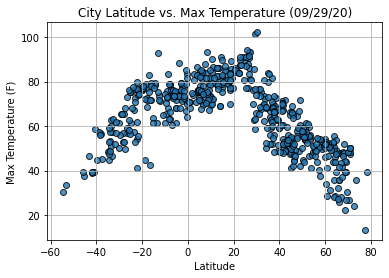

In [49]:
plt.scatter(city_lat,
           city_max_temp,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Fig1.png")

plt.show()

The closer the city is to 0 latitude there is an increase in tempurature.

## Latitude vs. Humidity Plot

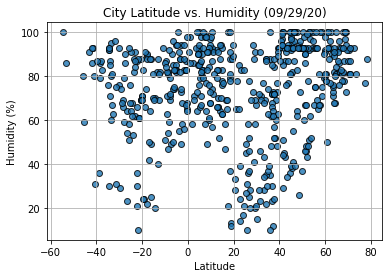

In [50]:
plt.scatter(city_lat,
           city_humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Fig2.png")

plt.show()

Cities futher away from the equator (0 latitude) have higher percentage of humidity.

## Latitude vs. Cloudiness Plot

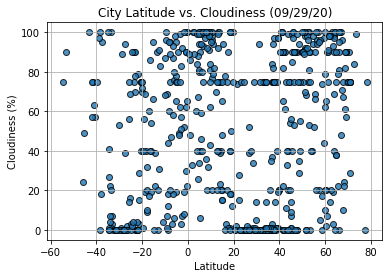

In [53]:
plt.scatter(city_lat,
           city_cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Fig3.png")

plt.show()

## Latitude vs. Wind Speed Plot

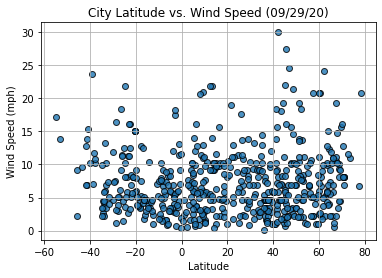

In [54]:
plt.scatter(city_lat,
           city_wind,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Fig4.png")

plt.show()

Wind speed is evenly distributed across the latitude, but more cities in the northern hemisphere experiencing high winds of 20 mph or more.

## Linear Regression

In [26]:
# Create northern and southern hemisphere DataFrame
northern = city_data_df.loc[city_data_df["Lat"] >= 0]
southern = city_data_df.loc[city_data_df["Lat"] < 0]

In [27]:
# Define function for creating linear agression and scatter plot
def plotLinearRegression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x,y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x, regress_values,"r-")
    return line_eq

# Define a function for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.8


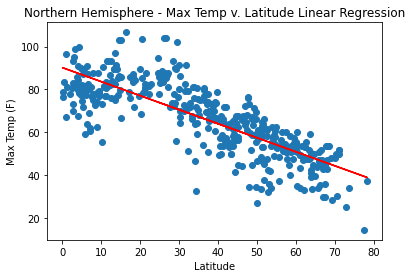

In [28]:
equation = plotLinearRegression(northern["Lat"], northern["Max Temp"])

annotate(equation, 0, 0)

plt.title("Northern Hemisphere - Max Temp v. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Max Temp (F)")

plt.savefig("../Images/Northern Hemisphere - Max Temp v. Latitude Linear Regression.png")

Northern hermisphere cities that are closer to the equator have higher temperautures with a -0.83 variance, and decreases futher up the hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.73


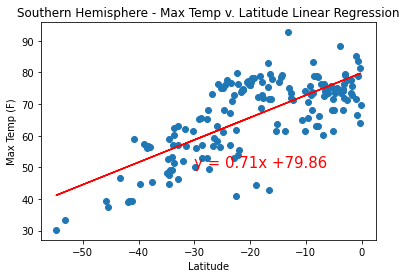

In [87]:
equation = plotLinearRegression(southern["Lat"], southern["Max Temp"])

annotate(equation, -30, 50)

plt.title("Southern Hemisphere - Max Temp v. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Max Temp (F)")

plt.savefig("../Images/Southern Hemisphere - Max Temp v. Latitude Linear Regression.png")

There is positive increase of tempurature with a 0.73 variance 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.17


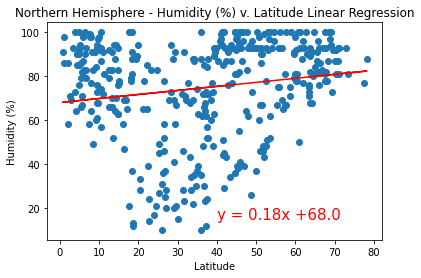

In [88]:
equation = plotLinearRegression(northern["Lat"], northern["Humidity"])

annotate(equation, 40, 15)

plt.title("Northern Hemisphere - Humidity (%) v. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")

plt.savefig("../Images/Northern Hemisphere - Humidity v. Latitude Linear Regression.png")

There is slight positive correlation between latitude and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.05


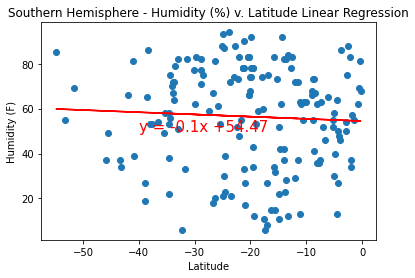

In [29]:
equation = plotLinearRegression(southern["Lat"], southern["Humidity"])

annotate(equation, -40, 50)

plt.title("Southern Hemisphere - Humidity (%) v. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Humidity (F)")

plt.savefig("../Images/Southern Hemisphere - Humidity v. Latitude Linear Regression.png")

There is almost a nutual difference between humitidy and latitude in the No

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.04


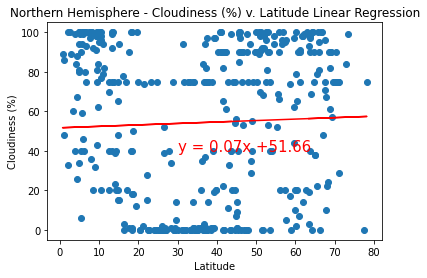

In [92]:
equation = plotLinearRegression(northern["Lat"], northern["Cloudiness"])

annotate(equation, 30, 40)

plt.title("Northern Hemisphere - Cloudiness (%) v. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

plt.savefig("../Images/Northern Hemisphere - Cloudiness v. Latitude Linear Regression.png")

There is a weak positive correlation between latitude and cloudiness in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.18


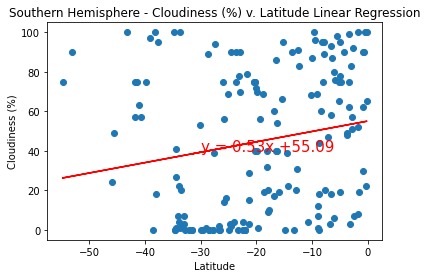

In [93]:
equation = plotLinearRegression(southern["Lat"], southern["Cloudiness"])

annotate(equation, -30, 40)

plt.title("Southern Hemisphere - Cloudiness (%) v. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")

plt.savefig("../Images/Southern Hemisphere - Cloudiness v. Latitude Linear Regression.png")

There is a positive correlation between latitude and cloudiness in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.11


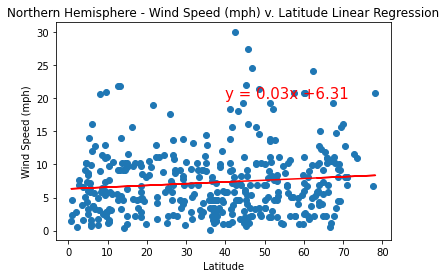

In [95]:
equation = plotLinearRegression(northern["Lat"], northern["Wind Speed"])

annotate(equation, 40, 20)

plt.title("Northern Hemisphere - Wind Speed (mph) v. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (mph)")

plt.savefig("../Images/Northern Hemisphere - Wind Speed (mph) v. Latitude Linear Regression.png")

There is postivie correlation between latitude and wind speed in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.27


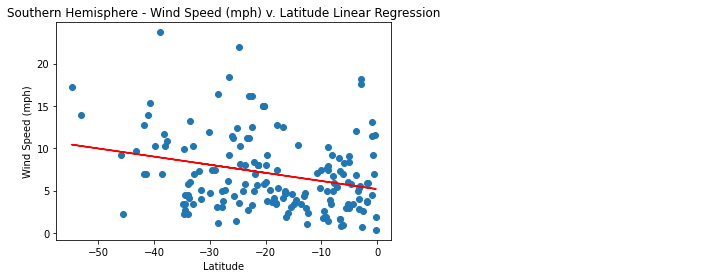

In [96]:
equation = plotLinearRegression(southern["Lat"], southern["Wind Speed"])

annotate(equation, 40, 20)

plt.title("Southern Hemisphere - Wind Speed (mph) v. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (mph)")

plt.savefig("../Images/Southern Hemisphere - Wind Speed (mph) v. Latitude Linear Regression.png")

There is a negative correlation between latitude and wind speed in the southern hemisphere.